# Optional Exercise 5 - Impulse Response and Convolution (40 mins)

## Objectives
- To introduce linear convolution for discrete-time signals 
- To show that circular convolution in the time domain is equivalent to multiplication in the frequency domain for discrete-time signals

## Video ([Backup Link](https://www.youtube.com/watch?v=aHRsuhWy470))

In [5]:
# Embed Youtube video
from IPython.display import HTML 
HTML('''<script> code_show=true;function code_toggle() {if (code_show){$('.cm-comment:contains(@hidden)').closest('div.input').hide();} else {$('.cm-comment:contains(@hidden)').closest('div.input').show();}code_show = !code_show} $( document ).ready(code_toggle);</script><center><iframe width="560" height="315" src="https://www.youtube.com/embed/aHRsuhWy470?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe></center>''') # @hidden

## Lab Exercise
<img src="img/ex5_1.svg" alt="Drawing" style="width: 900px;"/>
<center>Figure 5.1: Impulse response of a filter</center>

Suppose we apply a unit impulse function, $\delta[n]$, as an input into a filter with $(N+1)$ taps or filter coefficients. The output denotes the impulse response of the digital filter, $h[n]$, as shown  in  Fig. 5.1. Since the discrete-time system is time-invariant, the filter response to $\delta[n-k]$ is $h[n-k]$. 

In general, any input signal can be decomposed into a sum of impulses delayed by different amount and scaled by the signal value at the respective time samples i.e. $\{x[0]\delta[n], {x[1]\delta[n-1]}, \cdots, {x[N]\delta[n-N]}\}$. Consequently, the filter output is $y[n]=x[0]h[n]+x[1]{h[n-1]}+\cdots+x[N]{h[n-N]}$, which is defined as linear convolution.

>**<u>Example</u>** Consider a sequence of unit impulses of length $(N+1)$ as the input, $\{\delta[n],{\delta[n-1]},\cdots,{\delta[n-N]}\}$. Due to linearity, the response of the digital filter will be the sum of the outputs i.e. $y[n]=h[n]+{h[n-1]}+\cdots+{h[n-N]}$. 

<img src="img/ex5_2.svg" alt="Drawing" style="width: 900px;"/>
<center>Figure 5.2: Linear convolution in time domain</center>

---
**Definition:**
$$\text{Linear Convolution: }y[n]=x[n]*h[n]\overset{\Delta}{=}\sum^\infty_{k=-\infty}x[k]h[n-k]$$

---

If we substitute $r$ for $n-k$ this becomes:
$$y[n]=\sum_{r=-\infty}^{\infty}h[r]x[n-r]$$

Thus, for any linear time-invariant (LTI) filter, the output values consist of the sum of the past input values, weighted by the elements of the impulse response $h[n]$. This has been shown in Fig. 6.2. 

**Question 5.1** What information is needed in order to compute the output of a discrete-time LTI system?

**Question 5.2** We now know that $h[n]$ is the impulse response of a filter. How can you obtain its frequency response?

For the example presented in Fig. 5.2, let us the replicate the results. You can perform linear convolution in Python using the `np.convolve()` function.

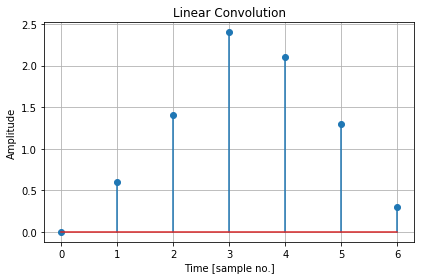

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from functions.lab_functions import plot_signal

x = [0, 1, 1, 1]
h = [0.6, 0.8, 1, 0.3]
y = np.convolve(x, h);

plt = plot_signal(y, title='Linear Convolution', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
plt.savefig('results/ex5/ex5_linear_convolution.pdf')
plt.show()

Earlier in Exercise 2, we learn that convolution in the time domain is equivalent to multiplication in the frequency domain. We should therefore be able to compute the same results in the frequency-domain using the `fft` and `ifft` functions.

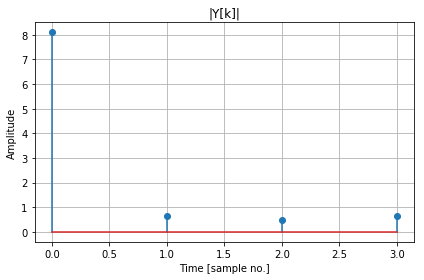

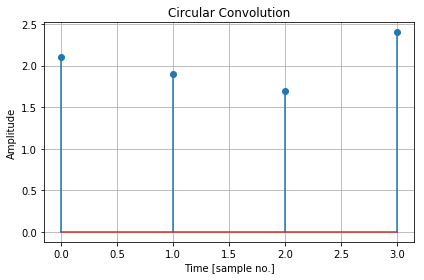

In [7]:
from scipy.fft import fft
from scipy.fft import ifft

x = [0, 1, 1, 1]
h = [0.6, 0.8, 1, 0.3]

X = fft(x)
H = fft(h)

Y = X*H
y = ifft(Y)

plt = plot_signal(abs(Y), title='|Y[k]|', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
plt.show()

plt = plot_signal(np.real(y), title='Circular Convolution', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
plt.savefig('results/ex5/ex5_circular_convolution.pdf')
plt.show()

**Question 5.3**: Describe and explain why $y[n]$ computed using both methods namely, linear convolution and the DFT, are different.

As a result of multiplication in the frequency-domain, the signal in the time-domain becomes periodic and the result is no longer a linear convolution. In fact for discrete-time signals, this multiplication in the frequency domain represents a different type of (periodic) convolution in the time domain, called **Circular Convolution** and is defined as

---
**Definition:**
$$\text{Circular Convolution: }y[n]=x[n] \circledast_N h[n]\overset{\Delta}{=}\sum^{N-1}_{k=0}x[k]h[(n-k)_{\text{mod }N}]$$

---

**Question 5.4**: Using the definition, can you think of a way to make circular convolution the same as the linear convolution? If so, modify the code below to calculate the linear convolution using only the `fft` and `ifft` functions?

>**GTA Tip**
>
>Google is your friend.

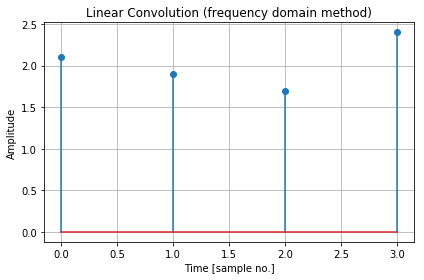

In [8]:
# TO DO: Modify this code so the output is the linear convolution of x and h

x = [0, 1, 1, 1]
h = [0.6, 0.8, 1, 0.3]

X = fft(x)
H = fft(h)

Y = X*H
y = ifft(Y)

plt = plot_signal(np.real(y), title='Linear Convolution (frequency domain method)', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
plt.show()

**Question 5.5**: Are there any differences between the linear convolution of a periodic signal and circular convolution?